# Imports

In [429]:
import math
from numpy import mgrid
import scipy.io as sio
import numpy as np
import cv2
from numpy import mgrid
import matplotlib.pyplot as plt

# Computer Exercise 1

In [430]:
def bilinear_interpolation(im, x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, im.shape[1]-1);
    x1 = np.clip(x1, 0, im.shape[1]-1);
    y0 = np.clip(y0, 0, im.shape[0]-1);
    y1 = np.clip(y1, 0, im.shape[0]-1);

    f00 = im[ y0, x0 ]
    f01 = im[ y1, x0 ]
    f10 = im[ y0, x1 ]
    f11 = im[ y1, x1 ]


    return (x1-x)*(y1-y)*f00 + (x1-x)*(y-y0)*f01 + (x-x0)*(y1-y)*f10 + (x-x0)*(y-y0)*f11

# Computer Exercise 2

In [431]:
def Calc_T(img, u, v):
    T = np.zeros((img.shape[0],img.shape[0]))
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            x = i - u[i, j]
            y = j - v[i, j]
            T[i, j] = bilinear_interpolation(img, y, x)
    return T

In [432]:
# wrapping Image

mdict = sio.loadmat("./imgs_for_optical_flow.mat")
image = mdict["img1"]
u = mdict["u"]
v = mdict["v"]
image = np.array(image, dtype="float32")

# My interpolation
T = Calc_T(image, u, v)

# opencv Remap
yy,xx=mgrid[0:img.shape[0],0:img.shape[1]]
map1 = np.array(yy - u, dtype="float32")
map2 = np.array(xx - v, dtype="float32")
remap_wrap = cv2.remap(image, map2, map1, cv2.INTER_LINEAR)

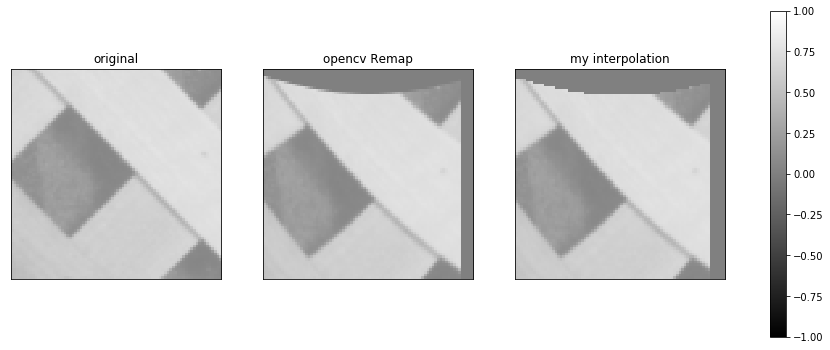

In [433]:
# Plotting ex2

x = []
x.append(image)
x.append(remap_wrap)
x.append(T)
labes = ['original', 'opencv Remap', 'my interpolation']
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i, Temp in enumerate(range(3)):
    t = ax[i].imshow(x[i], interpolation="None", vmin=-1, vmax=1, cmap="gray")
    ax[i].set_xticks([]), ax[i].set_yticks([])
    ax[i].set_title(labes[i])

fig.colorbar(t, ax=ax.ravel().tolist())
plt.show()

# Computer Exercise 3

In [434]:
def Calc_T_2(img, u, v):
    T = np.zeros((img.shape[0],img.shape[0]))
    newFlow = np.matrix([[0.5, 0.2, 0], [0, 0.5, 8]])
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            xy_vec = np.matrix([[i], [j], [1]])
            res_xy = newFlow * xy_vec
            #print(res_xy)
            T[i, j] = bilinear_interpolation(img, res_xy[1], res_xy[0])
    return T

In [435]:
# wrapping Image

# ex3 flow
ex3_T = Calc_T_2(image, u, v)


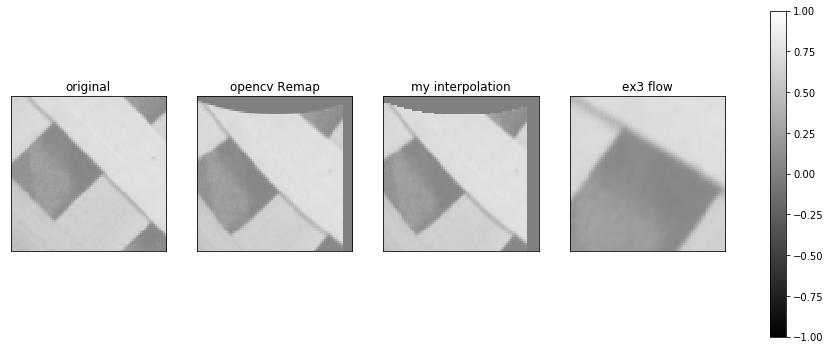

In [436]:
# Plotting ex3

x = []
x.append(image)
x.append(remap_wrap)
x.append(T)
x.append(ex3_T)
labes = ['original', 'opencv Remap', 'my interpolation', 'ex3 flow']
fig, ax = plt.subplots(1, 4, figsize=(16, 6))

for i, Temp in enumerate(range(4)):
    t = ax[i].imshow(x[i], interpolation="None", vmin=-1, vmax=1, cmap="gray")
    ax[i].set_xticks([]), ax[i].set_yticks([])
    ax[i].set_title(labes[i])

fig.colorbar(t, ax=ax.ravel().tolist())
plt.show()